# ANN & MNIST : exercise

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


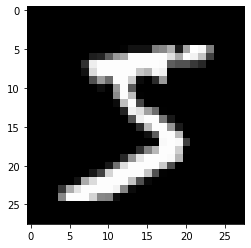

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [8]:
train_x.shape

(60000, 784)

* min-max scaling

In [9]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [13]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [14]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
len_y = len(set(train_y))

In [18]:
train_y.shape

(60000,)

In [19]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [20]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [21]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shaperain_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상!
                  patience=5,                  # 몇번이나 참을래?
                  min_delta = 0,               # loss가 현상 유지만 되어도 괜찮아
                  verbose=1,                   # 얼리스토핑이 어디서 되었는지 알려줌
                  restore_best_weights=True)   # 최적의 가중치를 모델에 넘겨줌

In [24]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5090 - accuracy: 0.8700 - val_loss: 0.3175 - val_accuracy: 0.9125
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3166 - accuracy: 0.9126 - val_loss: 0.2907 - val_accuracy: 0.9197
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.9190 - val_loss: 0.2758 - val_accuracy: 0.9231
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2815 - accuracy: 0.9206 - val_loss: 0.2681 - val_accuracy: 0.9262
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9232 - val_loss: 0.2657 - val_accuracy: 0.9277
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2682 - accuracy: 0.9244 - val_loss: 0.2651 - val_accuracy: 0.9288
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2644 - accuracy: 0.9257 - val_loss: 0.2636 - val_accuracy:

In [25]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.34%
테스트 정확도 : 92.81%


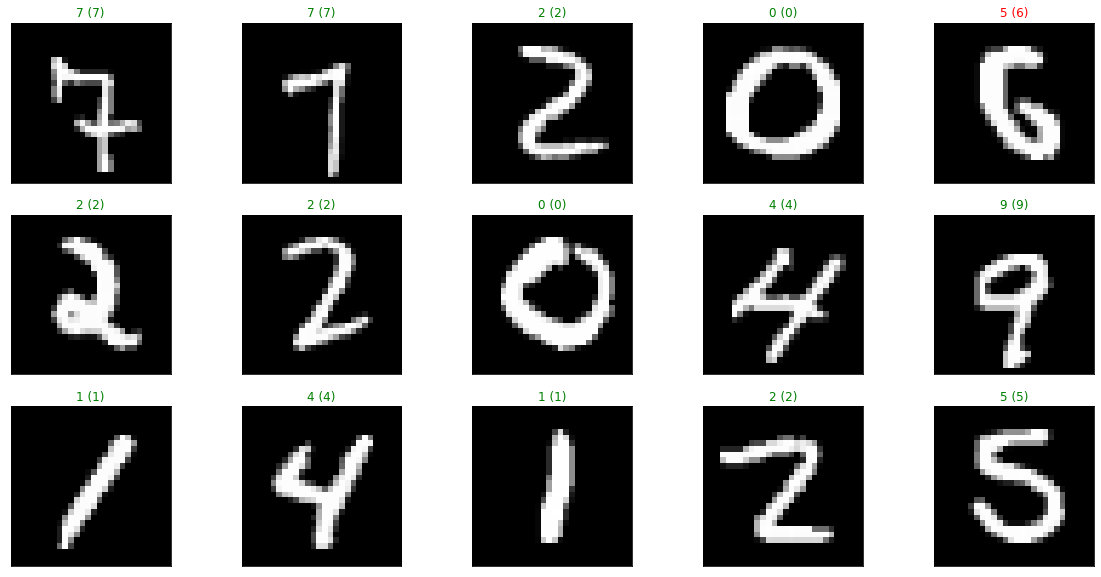

In [26]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 1228
다음 그림은 숫자 9 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  0. 50.  0.  0.  0.  0. 13. 33.]
틀렸어요


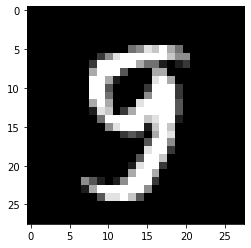

In [27]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [28]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2644 - accuracy: 0.9281


[0.26441195607185364, 0.9280999898910522]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [33]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
keras.backend.clear_session()

il = keras.layers.Input(shape = (train_x.shape[1]))
hl = keras.layers.Dense(256, activation = 'relu')(il)
hl = keras.layers.Dense(128, activation = 'relu')(hl)
hl = keras.layers.Dense(64, activation = 'relu')(hl)
ol = keras.layers.Dense(10, activation = 'softmax')(hl)

model = keras.models.Model(il, ol)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2359 - accuracy: 0.9294 - val_loss: 0.1249 - val_accuracy: 0.9603
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.9697 - val_loss: 0.1053 - val_accuracy: 0.9681
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0684 - accuracy: 0.9789 - val_loss: 0.0997 - val_accuracy: 0.9701
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0525 - accuracy: 0.9830 - val_loss: 0.0860 - val_accuracy: 0.9753
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0810 - val_accuracy: 0.9780
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 0.0942 - val_accuracy: 0.9753
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0983 - val_accuracy:

In [35]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.84%
테스트 정확도 : 97.73%


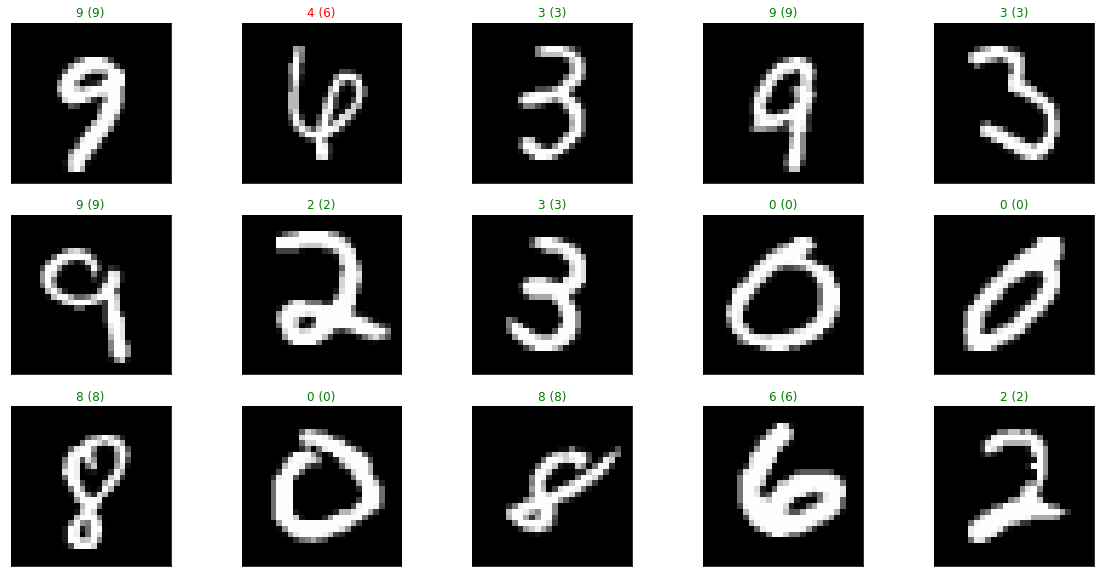

In [36]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 3030
다음 그림은 숫자 6 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  2.  6.  6.  0.  1.  1.  0. 79.  0.]
틀렸어요


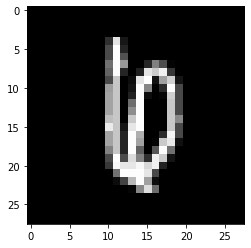

In [38]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [39]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9773


[0.08304918557405472, 0.9772999882698059]